<a href="https://colab.research.google.com/github/songseokbeom/ML_study/blob/master/3_3_LogisticRegression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [0]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
X_train_std = X_train_std.T
X_test_std = X_test_std.T
Y_train = np.reshape(Y_train, (1, Y_train.shape[0]))
Y_test = np.reshape(Y_test, (1, Y_test.shape[0]))

In [0]:
class LogisticRegressionGD(object):

  def __init__(self, lr=0.05, iter=100, random_state=1):
    self.lr = lr
    self.iter = iter
    self.random_state = random_state

  def fit(self, X, y):

    random_generator = np.random.RandomState(self.random_state)
    self.w = random_generator.normal(loc=0.0, scale=0.01,
                         size=(1, X.shape[0]))
    self.b = 0
    self.cost = []

    for i in range(self.iter):
      z = self.net_input(X)
      a = self.activation(z)
      errors = a - y
      self.update(errors, X)
      cost = (-np.dot(y, np.log(a))-np.dot((1-y), np.log(1-a)))
      self.cost.append(cost)
    return self
  
  def activation(self, z):
    return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

  def predict(self, X):
    return np.where(self.net_input(X)>=0.0, 1, 0)

  def net_input(self, X):
    return np.dot(self.w[0, :], X) + self.b

  def update(self, errors, X):
    self.w[0, :] = self.w[0, :] - self.lr * np.dot(errors, X.T)
    self.b = self.b - self.lr * errors.sum()

In [45]:
X_train_01 = X_train_std[:, (Y_train[0, :]==0)|(Y_train[0, :]==1)]
Y_train_01 = Y_train[:, (Y_train[0, :]==0)|(Y_train[0, :]==1)]

logistic_model = LogisticRegressionGD(lr=0.05, iter=1000, random_state=1)
logistic_model.fit(X_train_01, Y_train_01)

In [0]:

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
  markers=('s', 'x', 'o', '^', 'v')
  colors=('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))]) # np.unique: find unique elements in numpy array

  x1_min, x1_max = X[0, :].min() - 1, X[0, :].max() + 1
  x2_min, x2_max = X[1, :].min() - 1, X[1, :].max() + 1

  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))

  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]))
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1.T, xx2.T, Z.T, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[0, y[0, :]==cl],
                y=X[1, y[0, :]==cl],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black')

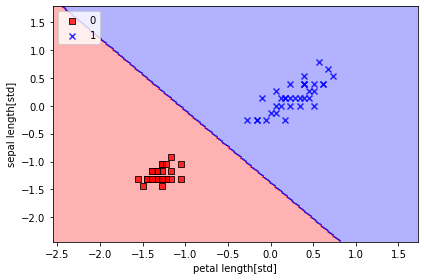

In [47]:
plot_decision_regions(X=X_train_01,
                      y=Y_train_01,
                      classifier=logistic_model)
plt.xlabel('petal length[std]')
plt.ylabel('sepal length[std]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()